# Mathematical Methods for Data Science

In [647]:
def plotChart(x1,x2,loss,loss1,loss2, algorithm):
    
    import seaborn as sns
    import matplotlib.pyplot as plt

    x_1 = np.array(x1) # X-axis
    x_2 = np.array(x2) # Y-Axis
    L1 = np.array(loss)
    # Data Dictionary
    data = {"x1": x_1,
            "x2": x_2}
    
    
    X1, X2 = np.meshgrid(x_1, x_2)
    Y = L1
    
    levels = np.sort(L1)
    # Plot Configuration
    plt.figure(figsize=(10,10))
    plt.title('X1-X2 Plane Values using {0} iterations'.format(algorithm),fontsize=20)
    

    X1 = np.linspace(-x_1[0] * 5, x_1[0] * 5, 15)
    X2 = np.linspace(-x_2[1] * 5, x_2[1] * 5, 15)
    losses = np.zeros(shape=(X1.size, X2.size))

    for i, value1 in enumerate(X1):
        for j, value2 in enumerate(X2):
            x_temp = np.array((value1,value2))        
            losses[i, j] = Y[i]
    
    cp = plt.contour(X1, X2, losses)
    plt.clabel(cp, inline=1, fontsize=10)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    
#     plt.contourf(X1, X2, losses, levels,alpha=.3)
#     plt.axhline(0, color='black', alpha=.5, dashes=[2, 4],linewidth=1)
#     plt.axvline(0, color='black', alpha=0.5, dashes=[2, 4],linewidth=1)
#     for i in range(len(X1) - 1):
#         plt.annotate('', xy=(X1[i + 1],X2[i+1]), xytext=(X1[i],X2[i]),
#                      arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
#                      va='center', ha='center')

#     CS = plt.contour(X1, X2, losses, levels, linewidths=1,colors='black')
#     plt.clabel(CS, inline=1, fontsize=8)
#     plt.title("Contour Plot of Gradient Descent")
#     plt.xlabel("X1")
#     plt.ylabel("X2")
#     plt.show()
    
#     levels = [0.0, 1.0, 2.0, 4.0, 8.0, 12.0, 14.0]
#     cp = plt.contour(X1, X2, Y, levels, linewidths=1)
#     plt.clabel(cp, inline=1, fontsize=10)
# #     cp = plt.contourf(X1, X2, Y, levels)
#     plt.xlabel('X1')
#     plt.ylabel('X2')
#     plt.show()
#     # Create plot
# #     plot = sns.kdeplot(x1, x2,legend="full", n_levels=5, cmap="Purples_d")
#     plt.ylabel('X2', fontsize=18)
#     plt.xlabel('X1', fontsize=18)

In [885]:
def plotChart(x1,x2,i, algorithm):
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt

    x_1 = np.array(x1) # X-axis
    x_2 = np.array(x2) # Y-Axis
    
    # Actual values
    x1_true = 2
    x2_true = 3

    # Plot Configuration
    plt.figure(figsize=(7,7))
    plt.title('X1-X2 Plane Values\n using {0} iterations'.format(algorithm),fontsize=15)
    plt.xlabel('X1', fontsize=20)
    plt.ylabel('X2', fontsize=20)
    
    # Compute the loss between actual X to calculated x        
    def cost_func(x_1, x_2):
        
        X1 = np.atleast_3d(np.asarray(x_1))
        X2 = np.atleast_3d(np.asarray(x_2))
        losses = np.zeros(shape=(x_1.size, x_2.size))

        for i in range(x_1.shape[1]):
            for j in range(x_2.shape[0]):
                losses[i, j] = x1_true-X1[:,i,:] + x2_true-X2[j,:,:]
        
        return losses

    # First construct a grid of (X1, X2) parameter pairs and their
    # corresponding cost function values.
    x1_grid = np.linspace(-1-np.min(x_1),1+np.max(x_1),i)
    x2_grid = np.linspace(-1-np.min(x_2),1+np.max(x_2),i)
    J_grid = cost_func(x1_grid[np.newaxis,:,np.newaxis], x2_grid[:,np.newaxis,np.newaxis])

    # A labeled contour plot
    X, Y = np.meshgrid(x1_grid, x2_grid)
    contours = plt.contour(X, Y, J_grid, 20)
    plt.clabel(contours)
    
    # The origin parameter values 
    plt.scatter([1]*2,[1]*2,s=[100,20], color=['k','w'])
    
    # The target parameter values 
    plt.scatter([x1_true]*2,[x2_true]*2,s=[100,20])

    
    # Mark convergence arrows within chart
    for k in range(len(x_1)-1):
        plt.annotate('', xy=(x_1[k + 1],x_2[k+1]), xytext=(x_1[k],x_2[k]),
                     arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                     va='center', ha='center')
    
    plt.show()

1. (40 pts) In the following, supply the code, and a plot, of the iterations in the x1, x2 plane, starting at
x = (1, 1). Define Ax = b where
A :=
(2 3
 3 5)
; b := (13, 21).

1.1. Find x using Gauss-Seidel iterations.
 

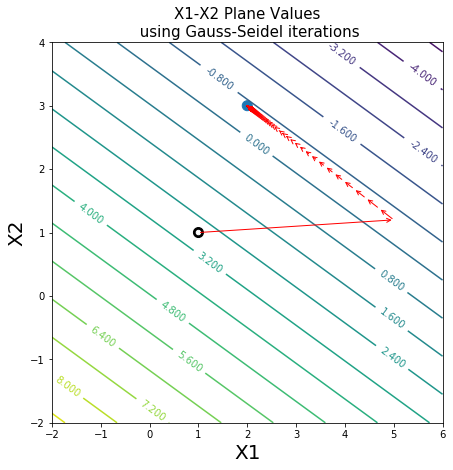

Total Iterations: 199
A:
[[2 3]
 [3 5]]
b:
[13 21]
x:
[2. 3.]


In [886]:
def GS(A, b, x, epsilon=10E-9):
    
    import numpy as np
    
    # initialize lists
    x1 = []
    x2 = []
    loss = []
    loss1 = []
    loss2 = []
    # Calculate lower triangular matrix L
    L = np.tril(A)
    
    # Calculate Upper triangular matrix U
    U = A - L
    
    # Set iterations to zero
    i = 0
    
    # Set x_prev to infinity
    x_prev = np.full(x.shape, np.inf)
    
    # Iterate until the distance between is not greater than epsilon                                                                                                                                                                         
    while (not np.allclose(x,x_prev,epsilon,epsilon)):
        i = i +1
        
        # Store values for plotting
        x1.append(x[0])
        x2.append(x[1])
        
        # Save last x result
        x_prev = x
        
        # Calculate new x based on Gauss-Seidel 
        x = np.dot(np.linalg.inv(L), b - np.dot(U, x))
        
        delta = np.subtract(x,x_prev)
        L1 = np.linalg.norm(delta,ord=1)
        loss1.append(delta[0])
        loss2.append(delta[1])
        
    # Plot x1-x2 plane     
    plotChart(x1,x2,i,"Gauss-Seidel") 
    
    print("Total Iterations: {0}".format(i))
    
    return x

A = np.array([[2,3],[3,5]])
b = np.array([13,21])
x = np.array([1,1])

x = GS(A,b,x,epsilon=10E-11)

print ("A:")
print(A)

print ("b:")
print(b)

print ("x:")
print(sol)

1.2. Find x using Jacobi iterations.

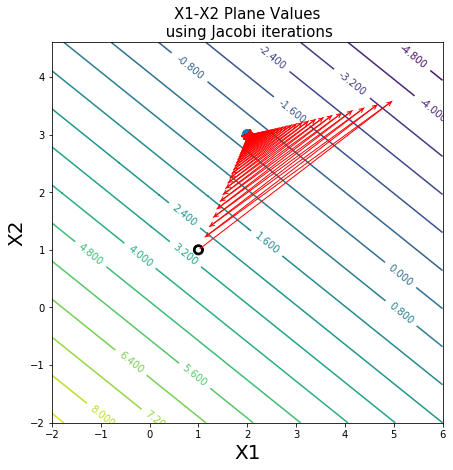

Total Iterations: 387
A:
[[2 3]
 [3 5]]
b:
[13 21]
x:
[2. 3.]


In [887]:
def jacobi(A, b, x, epsilon=10E-9):
    
    import numpy as np
    
    # initialize lists
    x1 = []
    x2 = []
    
    # Create a vector of the diagonal elements of A                                                                                                                                                
    # and subtract them from A                                                                                                                                                                     
    D = np.diag(A)
    E = A - np.diagflat(D)
    
    # Assigning infinity values
    delta = np.full(x.shape, np.inf)
    
    # Set iterations to zero
    i = 0
    
    # Iterate until the L1 Norm of delta is not more than epsilon                                                                                                                                                                         
    while (np.linalg.norm(delta,ord=1) > epsilon) :
        
        i = i + 1
        
        # Store values for plotting
        x1.append(x[0])
        x2.append(x[1])
        
        # Save last x result
        x_prev = x
        
        # Calculate new x based on Jacobi  
        x = (b - np.dot(E,x)) / D
        
        # Calculate differences between last x to new x
        delta = np.subtract(x,x_prev)
        
    # Plot x1-x2 plane     
    plotChart(x1,x2,i, "Jacobi")  
    
    print("Total Iterations: {0}".format(i))
    
    return x

# Execution
A = np.array([[2,3],[3,5]])
b = np.array([13,21])
x = np.array([1,1])

sol = jacobi(A,b,x, epsilon=10E-9)

print ("A:")
print(A)

print ("b:")
print(b)

print ("x:")
print(sol)

1.3 Find x using Steepest Descent (a.k.a. Gradient Decent), with exact line-searches.
Reference: https://ocw.mit.edu/courses/mathematics/18-409-topics-in-theoretical-computer-science-an-algorithmists-toolkit-fall-2009/lecture-notes/MIT18_409F09_scribe21.pdf

Total Iterations: 5


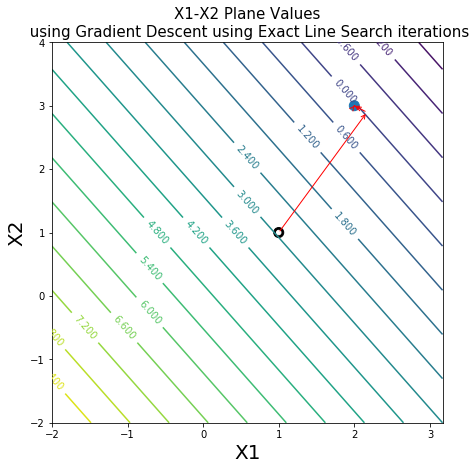

A:
[[2 3]
 [3 5]]
b:
[13 21]
x:
[2. 3.]


In [888]:
def GDELS(A, b, x, epsilon=10E-9):
    
    import numpy as np
    
    # initialize lists
    x1 = []
    x2 = []
    
    # Assigning infinity values
    delta = np.full(x.shape, np.inf)
    
    # Set iterations to zero
    i = 0
    
    # Iterate L1 Norm of delta is not more than epsilon                                                                                                                                                                         
    while (np.linalg.norm(delta,ord=1) > epsilon) :
        
        i = i + 1
        
        # Store values for plotting
        x1.append(x[0])
        x2.append(x[1])
        
        # Save last x result
        x_prev = x
        
        # Calculating residuals
        r = np.subtract(b,np.dot(A,x))
        
        # Calculating residuals (differences between b and the result Axi of the approximation in "range-space")
        alpha = np.dot(r.T,r)/np.dot(np.dot(r.T,A),r)
        
        # Calculate new x based on Gradient Descent with exact line search
        x = np.add(x,np.dot(alpha,r))
        
        # Calculate differences between last x to new x
        delta = np.subtract(x,x_prev)
    
    print("Total Iterations: {0}".format(i))
    
    # Plot x1-x2 plane     
    plotChart(x1,x2,i, "Gradient Descent using Exact Line Search")
    
    return x

A = np.array([[2,3],[3,5]])
b = np.array([13,21])
x0 = np.array([1,1])

x = GDELS(A,b,x0,epsilon=10E-6)
print ("A:")
print(A)

print ("b:")
print(b)

print ("x:")
print(x)

1.4 Find x using coordinate-decent, i.e., optimizing a single coordinate per iteration. You are free to chose the type of descent you perform at each coordinate.

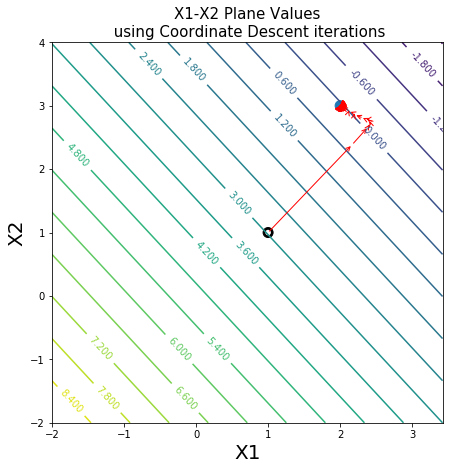

Total Iterations: 124
A:
[[2 3]
 [3 5]]
b:
[13 21]
x:
[2. 3.]


In [889]:
def CD(A, b, x, epsilon=10E-9):
    
    import numpy as np
    
    # initialize lists
    x1 = []
    x2 = []
    
    # Number of columns
    n = A.shape[1]
    
    # Set iterations to zero
    i = 0
    
    # Set x_prev to infinity
    x_prev = np.full(x.shape, np.inf)
    
    # Iterate until the distance between is not greater than epsilon                                                                                                                                                                         
    while (not np.allclose(x,x_prev,epsilon,epsilon)):
        
        i = i + 1
        
        # Store values for plotting
        x1.append(x[0])
        x2.append(x[1])
        
        # Save last x result
        x_prev = x
        x=x.astype(float)
        
        for coordinate in range(n):
        
            # Calculating residuals
            r = np.subtract(b,np.dot(A,x))

            # Calculating residuals (differences between b and the result Axi of the approximation in "range-space")
            alpha = np.dot(r.T,r)/np.dot(np.dot(r.T,A),r)

            # Calculate new x based on Coordinate Descent
            np.put(x, [coordinate], [x[coordinate] + np.dot(alpha,r)[coordinate]])

    # Plot x1-x2 plane     
    plotChart(x1,x2,i, "Coordinate Descent")  
    
    print("Total Iterations: {0}".format(i))
    
    return x

A = np.array([[2,3],[3,5]])
b = np.array([13,21])
x0 = np.array([1,1])

x = CD(A,b,x0,epsilon=10E-11)
print ("A:")
print(A)

print ("b:")
print(b)

print ("x:")
print(x)

2. Generate 100 samples from Binom(10, 0.5). You are allowed to use your software’s Unif[0, 1]
generator. I want the code, and a histogram of 1,000 samples.

    2.1. Use the inverse probability transform (F−1(t)). You are allowed to use your software’s quantile functions.

Ref: https://www.sciencedirect.com/topics/mathematics/inverse-transform-method

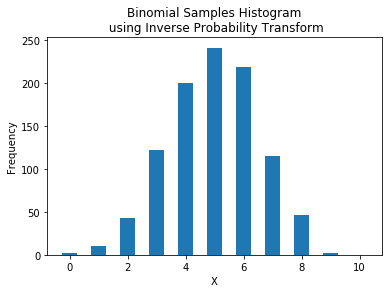

In [286]:
def binomial_IPT(n,p,amount):
    
    import matplotlib.pyplot as plt
    import random
    
    # Init list of samples
    samples = []
    
    # Sampling binomial random variables based on the given amount 
    for sample in range(amount):
        
        # Calculate p0
        prob = (1-p)**n
        
        # Init accumalative probabality function 
        F = prob
        
        # Set k to 0 trials
        k = 0
        
        # Sample a uniform(0,1) random variable
        u = random.uniform(0,1)
        
        # Loop as long as the accumalative probabality function (F) is less or equal than U
        while u > F:
            
            # Calculate current trial probabilities
            prob = ((n-k)/(k+1))*(p/(1-p))*prob
            
            # Calculate the accumalative probabality function (F)
            F = F + prob
            
            # Increase k
            k = k + 1
        
        # Set x to k
        x = k
        
        # Add current sample to sample's list
        samples.append(x)
    
    # Plot histogram
    plt.hist(samples, bins=range(0,n+2),align="left", rwidth=0.5)
    plt.title("Binomial Samples Histogram\n using Inverse Probability Transform")
    plt.xlabel("X")
    plt.ylabel("Frequency")

    return samples

samples = binomial_IPT(n=10,p=0.5,amount=1000)

    2.2 Use accept reject (a.k.a. rejection sampling), with proposals from Unif{0, 10}. Use only your software’s Unif[0, 1] generator.

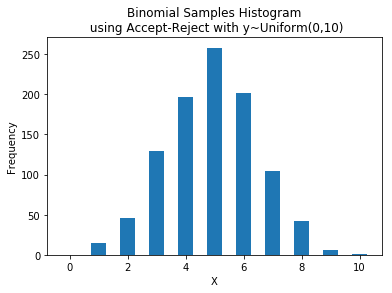

In [306]:
def binomial_AR(n,p,amount):

    import matplotlib.pyplot as plt
    from math import factorial
    import random
    import numpy as np
    
    # Init list of samples
    samples = []
    f_x = []
    g_x = []
    
    # Sampling binomial random variables based on the given amount 
    for sample in range(amount):
        
         while True:
            
            # Sample a uniform(0,1) random variable
            u = random.uniform(0,1)
            
            # Sample a uniform(0,10) random variable
            y = round(random.uniform(0,1)*10)
            
            # Caclculate f(y) probability using binomial function
            fy = (factorial(n)/(factorial(n-y)*factorial(y)))*(p**y)*((1-p)**(n-y))
            
            # The uniform(0,10) function g(y)
            gy = 1/10
            
            # Calculating normalization factor m 
            m = (1/gy)*np.max([(factorial(n)/(factorial(n-y)*factorial(y)))*(p**y)*((1-p)**(n-y)) for y in range(0,n+1)])
            
            # Acceptance condition  
            if u <= (fy/(gy*m)):
                
                # Set x to y
                x = y
                
                # Add current sample to sample's list
                samples.append(x)
                
                # Stop while loop
                break

    # Plot histogram
    plt.hist(samples, bins=range(0,n+2),align="left", rwidth=0.5)
    plt.title("Binomial Samples Histogram\n using Accept-Reject with y~Uniform(0,10)")
    plt.xlabel("X")
    plt.ylabel("Frequency")

    return samples

samples = binomial_AR(n=10,p=0.5,amount=1000)

    2.3. Use Metropolis-Hastings with a proposal distribution of your choice.

In [350]:
def normal_BM(mu, sigma):
    from math import sqrt, sin, pi, log
    
    # Sample two uniform(0,1) random variables
    u1 = random.uniform(0,1)
    u2 = random.uniform(0,1)
    
    # Generate a Normal Standard random variable z using Box-Muller transform z~N(0,1)
    z = sqrt(-2*log(u1))*sin(2*pi*u2)
    
    # Shift and scale z to be distributed as N~(mu,sigma)
    return mu + z*sigma

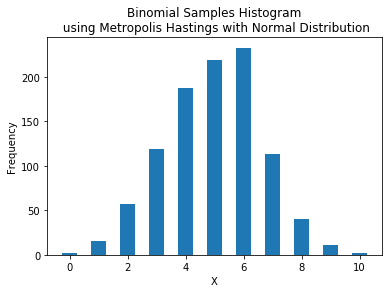

In [351]:
def binomial_MH(n,p,amount):

    import matplotlib.pyplot as plt
    from math import factorial
    import random
    
    # Init list of samples
    samples = []
    f_x = []
    g_x = []
    
    # Set x<t> to zero
    xt = 0
    
    # Sampling binomial random variables based on the given amount 
    for sample in range(amount):
        
        # Generate Yt from the Normal Distribution with mu = 5 and sigma = 5/3
        yt = round(normal_BM(mu=5, sigma=5/3))
        
        # In case of out of bounds, for negative set y<t> to zero, for positive set y<t> to n
        yt = max(0,min(yt,n))

        # Caclculate f(yt) probability using binomial function
        fy = (factorial(n)/(factorial(n-yt)*factorial(yt)))*(p**yt)*((1-p)**(n-yt)) 
        
        # Caclculate f(yt) probability using binomial function
        fx = (factorial(n)/(factorial(n-xt)*factorial(xt)))*(p**xt)*((1-p)**(n-xt)) 
        
        # Sample a uniform(0,1) random variable
        u = random.uniform(0,1)
        
        if u <= min(fy/fx,1):
            
            # Set x<t+1> to y<t>
            xt1 = yt
        
        else:
            
            # Set x<t+1> to x<t>
            xt1 = xt
            
        # Add current sample to sample's list
        samples.append(xt1)

            
    # Plot histogram
    plt.hist(samples, bins=range(0,n+2),align="left", rwidth=0.5)
    plt.title("Binomial Samples Histogram\n using Metropolis Hastings with Normal Distribution")
    plt.xlabel("X")
    plt.ylabel("Frequency")

    return samples

# Execution
samples = binomial_MH(n=10,p=0.5,amount=1000)

#### 3. (10 pts) What are the first 10 numbers in the sequence of a linear congruent generator with:
   a = 1664525, c = 0, m = $2^{32}$, $x_{0}$ = 3? Provide  sequence and code.</br>

### <font color='green'>LCG(..) - Linear Congruential Generator </font> ###

- **Inputs:**
  - *a* - The multiplier
  - *c* - The increment
  - *modulus* - The modulus
  - *$x_{0}$* - Initial seed
  - *amount* - Amount of numbers to be generated

- **Outputs:**
  - *sequence* - Sequence List

In [35]:
def LCG(a, c, modulus, x0, amount):
    
    # Init seed to given x0
    seed = x0
    sequence = []
    for i in range(0,amount+1):
        
        print("X{0} = {1}".format(i,seed))
        
        # Add current seed to sequence
        sequence.append(seed)
        
        # Calculate next seed
        seed = (a * seed + c) % modulus
       
    return sequence   

# Execute LCG
sequence = LCG(1664525, 0, 2**32, 3, 10)

X0 = 3
X1 = 4993575
X2 = 1168709115
X3 = 232464319
X4 = 476952243
X5 = 4292385047
X6 = 1044246571
X7 = 1258902575
X8 = 3214606435
X9 = 2259777287
X10 = 740218203
